In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt #menampilkan image
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

In [45]:
train_path = r'C:\Users\ACER\OneDrive\Desktop\Semester 7\Praktikum Kecerdasan Buatan\PROJECT AKHIR\Dataset\train'
test_path = r'C:\Users\ACER\OneDrive\Desktop\Semester 7\Praktikum Kecerdasan Buatan\PROJECT AKHIR\Dataset\test'

train_gen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range = 30, #derajat
    shear_range= .2,
    zoom_range=.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_gen = ImageDataGenerator(
    rescale=1./255
)

In [51]:
train_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(224, 224), #membuat semua gambar menjadi ukuran 224 x 224
    batch_size=27,   #berapa bnyk dta gambar setiap epoch
    class_mode ='categorical', #one shot encoding
    shuffle=False
)

test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(224, 224), #membuat semua gambar menjadi ukuran 224 x 224
    batch_size=18,   #berapa bnyk dta gambar setiap epoch
    class_mode ='categorical', #one shot encoding
    shuffle=True
)

Found 972 images belonging to 9 classes.
Found 243 images belonging to 9 classes.


In [52]:
images, label = train_generator.next()

In [53]:
len(images)

27

In [54]:
labels = ['Black', 'Blue', 'Brown', 'Green','Orange', 'Red', 'Violet', 'White', 'Yellow']

C:\Users\ACER\AppData\Local\Temp\ipykernel_8412\502385689.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(index)


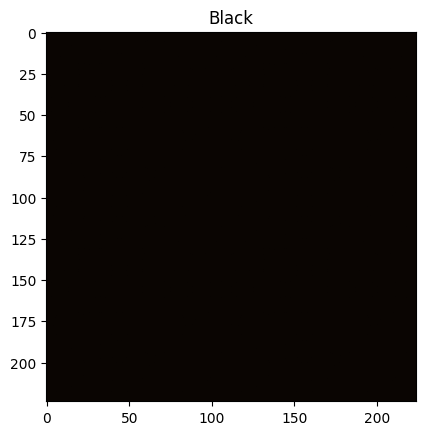

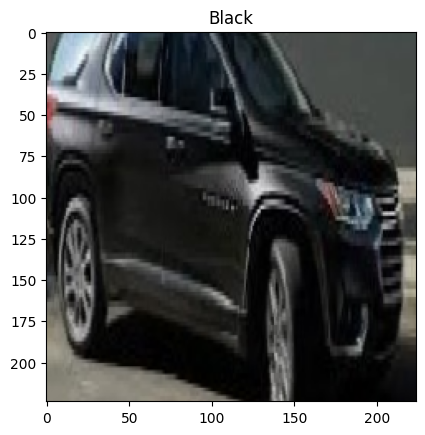

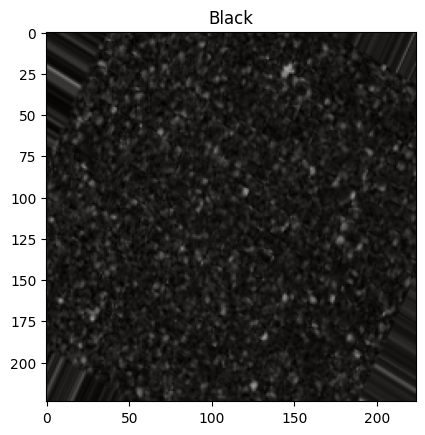

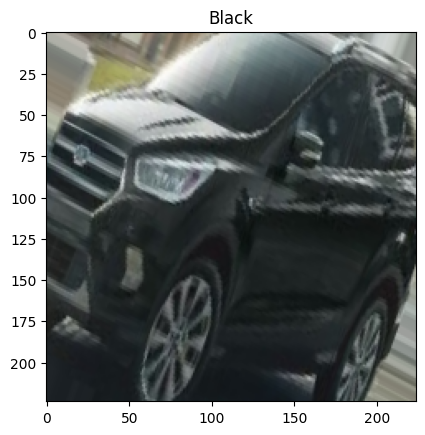

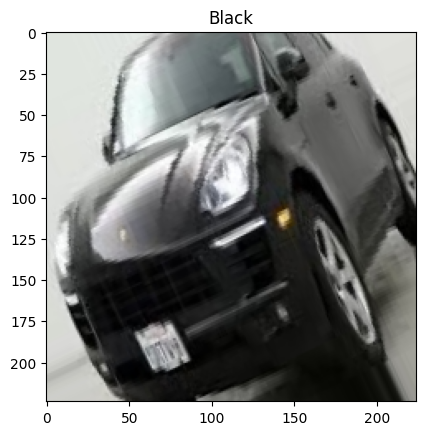

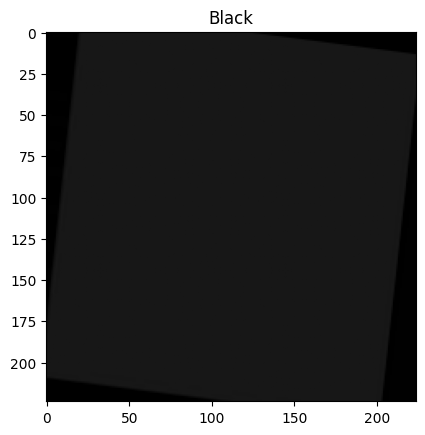

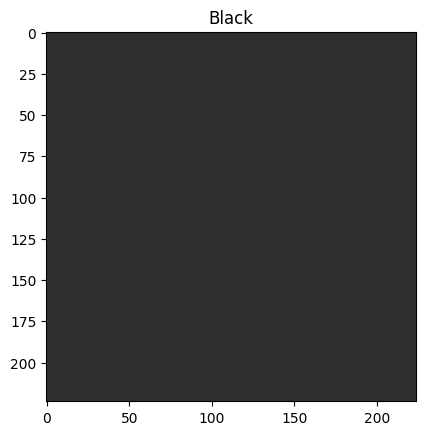

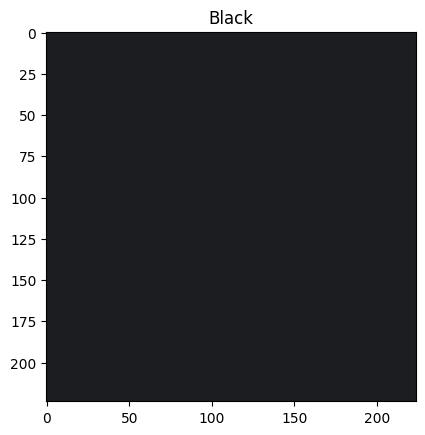

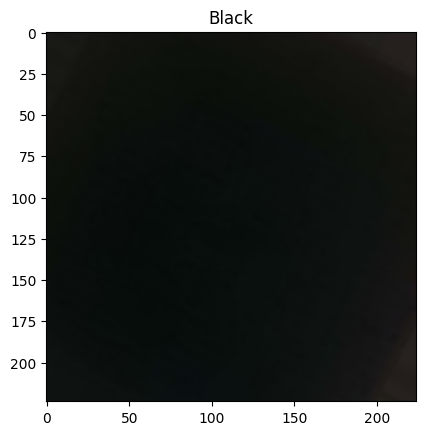

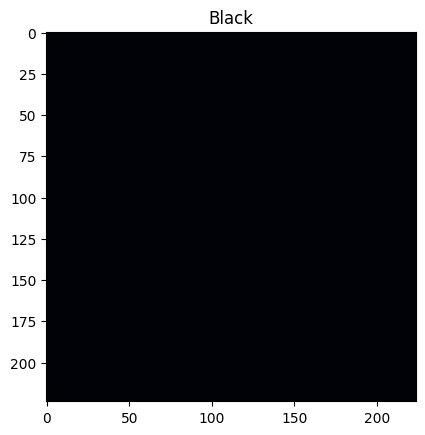

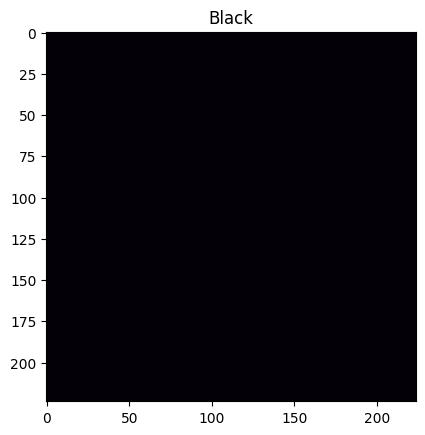

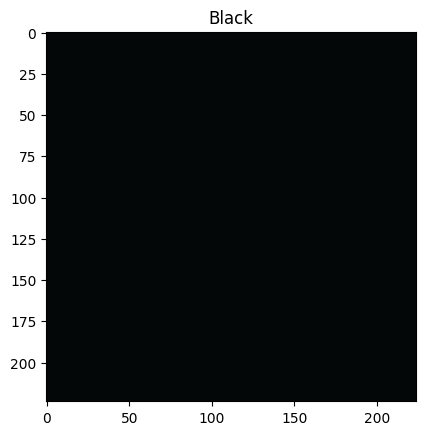

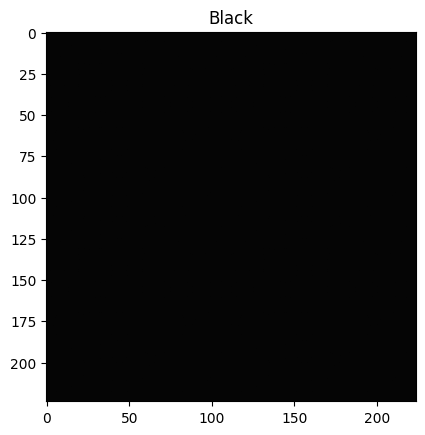

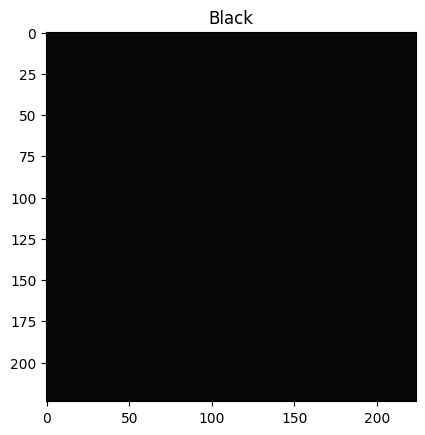

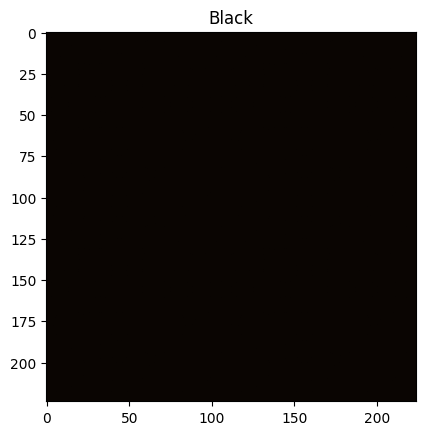

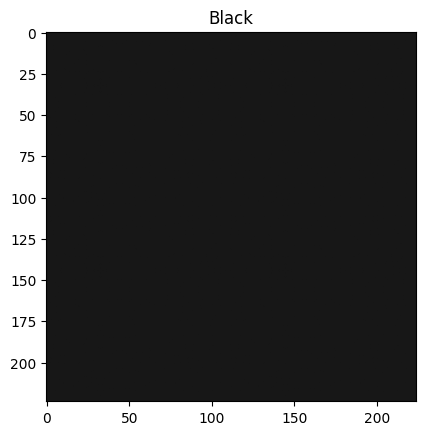

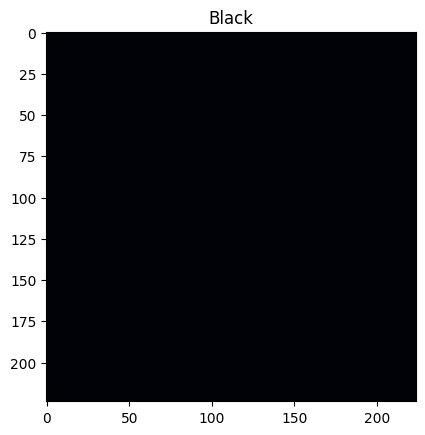

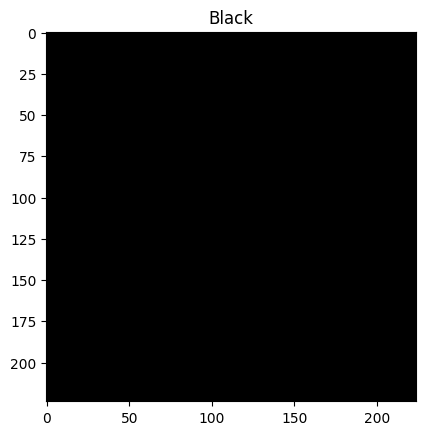

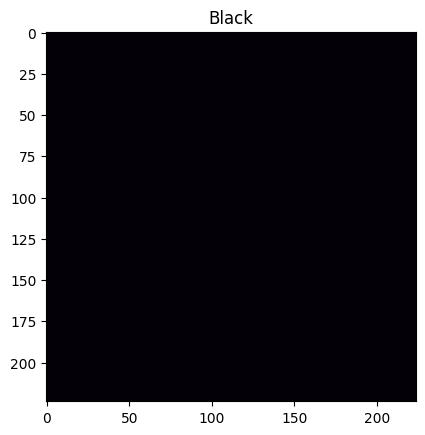

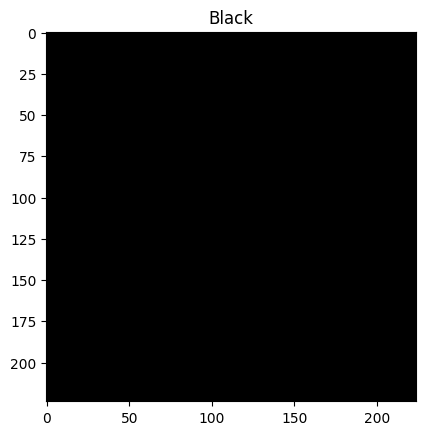

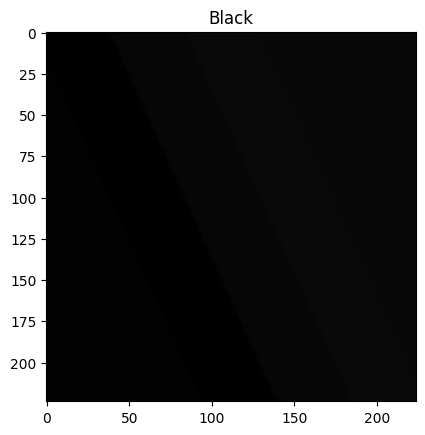

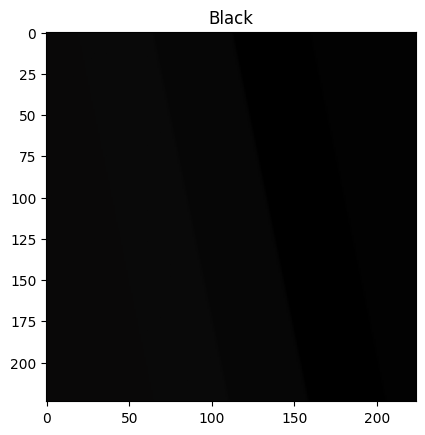

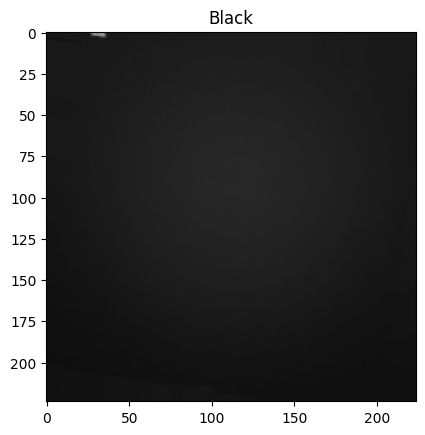

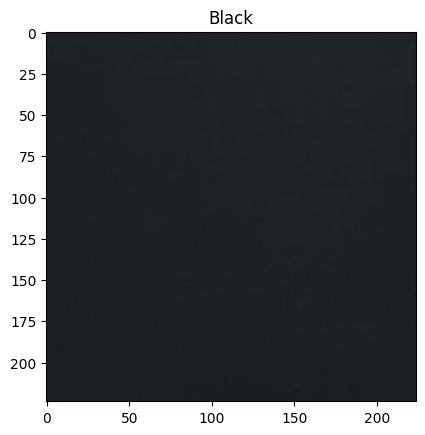

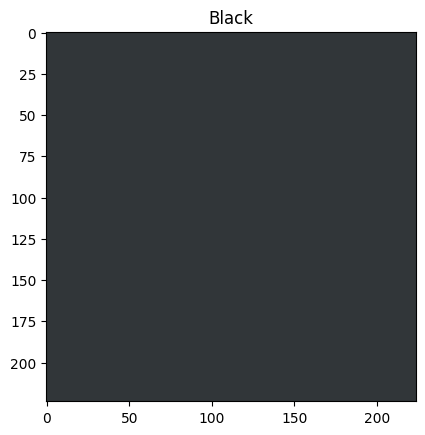

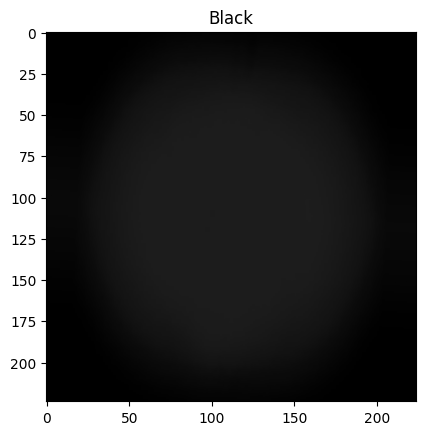

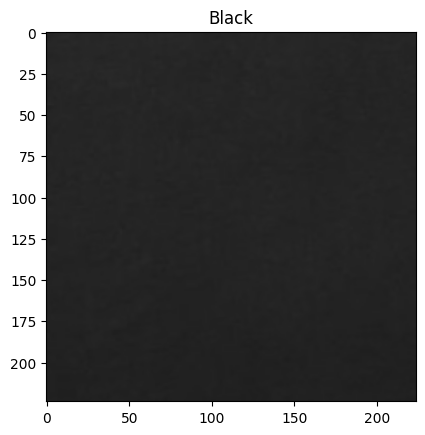

In [55]:
for index in range(len(images)):
    plt.figure(index)
    plt.imshow(images[index])
    plt.title(labels[tf.argmax(label[index])])
plt.show()

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,4), activation = 'relu', input_shape=(224,224, 3)),
    tf.keras.layers.MaxPooling2D(1,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
    
])

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 221, 32)      800       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 397824)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                25460800  
                                                                 
 dense_7 (Dense)             (None, 9)                 585       
                                                                 
Total params: 25,462,185
Trainable params: 25,462,185
Non-trainable params: 0
__________________________________________

In [57]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss= tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [58]:
history = model.fit(
    train_generator,
    epochs = 25,
    validation_data = test_generator
)

Epoch 1/25
36/36 [==============================] - 29s 767ms/step - loss: 65.0886 - accuracy: 0.1759 - val_loss: 16.0120 - val_accuracy: 0.1070
Epoch 2/25
36/36 [==============================] - 26s 713ms/step - loss: 5.0609 - accuracy: 0.2335 - val_loss: 2.7150 - val_accuracy: 0.2922
Epoch 3/25
36/36 [==============================] - 26s 710ms/step - loss: 1.9286 - accuracy: 0.5689 - val_loss: 2.0543 - val_accuracy: 0.4609
Epoch 4/25
36/36 [==============================] - 26s 722ms/step - loss: 1.5315 - accuracy: 0.5782 - val_loss: 1.3738 - val_accuracy: 0.5885
Epoch 5/25
36/36 [==============================] - 26s 730ms/step - loss: 1.0736 - accuracy: 0.7016 - val_loss: 1.0051 - val_accuracy: 0.6708
Epoch 6/25
36/36 [==============================] - 27s 745ms/step - loss: 0.8668 - accuracy: 0.7130 - val_loss: 1.6209 - val_accuracy: 0.5185
Epoch 7/25
36/36 [==============================] - 27s 736ms/step - loss: 1.0247 - accuracy: 0.7613 - val_loss: 1.1782 - val_accuracy: 0.60

In [59]:
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']
y_loss_train = history.history ['loss']
y_loss_val = history.history['val_loss']
x_ = range(len(y_acc_train))

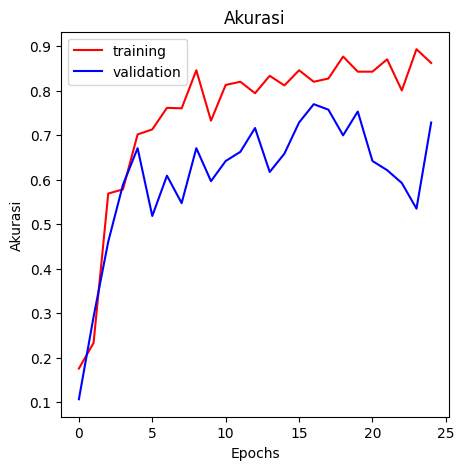

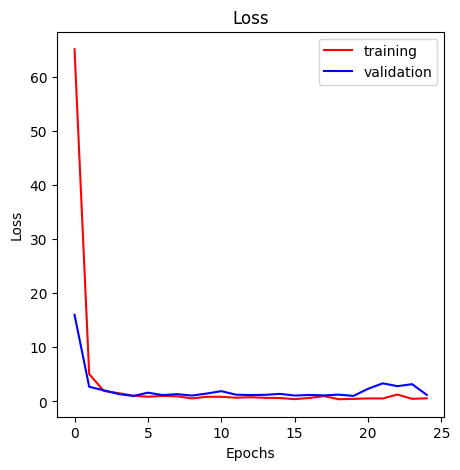

In [60]:
plt.figure(1, figsize=(5,5))
plt.plot(x_, y_acc_train, c='r', label='training')
plt.plot(x_, y_acc_val, c='b', label='validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,5))
plt.plot(x_, y_loss_train, c='r', label='training')
plt.plot(x_, y_loss_val, c='b', label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()